# Import Library

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
def save_model(model):
    pickle.dump(model, open("./assets/model.pkl", "wb"))


def load_model():
    return pickle.load(open("./assets/model.pkl", "rb"))

# Create Directory if Not Exist

In [1]:
import os

if not os.path.exists('assets'):
   os.makedirs('assets')

# Breast Dataset

- malignant: cancer
- benign: not cancer

In [3]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
feature_names = cancer.feature_names
print(f"There are {len(feature_names)} features")

There are 30 features


In [5]:
labels = cancer.target_names
print(labels)

['malignant' 'benign']


# Create Dataframe

In [6]:
data   = cancer["data"]
target = cancer["target"]

DF = pd.DataFrame(data, columns=feature_names)
DF["breast cancer"] = target
DF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,breast cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
DF.describe().round(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,breast cancer
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,0.06,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,0.63
std,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,0.01,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,0.48
min,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,0.06,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,0.00
50%,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,0.06,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,1.00
75%,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,0.07,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,1.00
max,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,0.10,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,1.00


In [8]:
# Count total missing values in a dataframe
print(f"There are {DF.isnull().sum().sum()} missing values")

There are 0 missing values


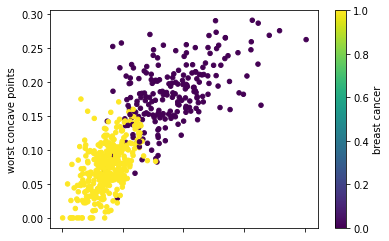

In [9]:
DF.plot.scatter(
    x='worst perimeter',
    y='worst concave points',
    c='breast cancer',
    colormap='viridis'
)
plt.show()

In [7]:
# save DataFrame to csv file
DF.to_csv("./assets/cancer.csv", index=False)

# Decision Tree Model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (455, 30) (455,)
Test set: (114, 30) (114,)


In [11]:
TREE = DecisionTreeClassifier(criterion="entropy", max_depth=5)

TREE.fit(x_train, y_train)
predictions = TREE.predict(x_test)

# Prediction with your own data


In [8]:
# load model
TREE = load_model()

# load dataframe
DF = pd.read_csv("./assets/cancer.csv")

In [10]:
feature_names = DF.columns[:-1]
features = np.ones((1, len(feature_names)))

for i, name in enumerate(feature_names):
    min_val = DF[name].min()
    max_val = DF[name].max()

    print(f"{i + 1:02}.) {name} = [{min_val:.2f}, {max_val:.2f}]")
    data = input(f"Enter your {name}: ").strip()
    features[0, i] = data if data else DF[name].mean()

features = features.astype(np.float64)

01.) mean radius = [6.98, 28.11]
02.) mean texture = [9.71, 39.28]
03.) mean perimeter = [43.79, 188.50]
04.) mean area = [143.50, 2501.00]
05.) mean smoothness = [0.05, 0.16]
06.) mean compactness = [0.02, 0.35]
07.) mean concavity = [0.00, 0.43]
08.) mean concave points = [0.00, 0.20]
09.) mean symmetry = [0.11, 0.30]
10.) mean fractal dimension = [0.05, 0.10]
11.) radius error = [0.11, 2.87]
12.) texture error = [0.36, 4.88]
13.) perimeter error = [0.76, 21.98]
14.) area error = [6.80, 542.20]
15.) smoothness error = [0.00, 0.03]
16.) compactness error = [0.00, 0.14]
17.) concavity error = [0.00, 0.40]
18.) concave points error = [0.00, 0.05]
19.) symmetry error = [0.01, 0.08]
20.) fractal dimension error = [0.00, 0.03]
21.) worst radius = [7.93, 36.04]
22.) worst texture = [12.02, 49.54]
23.) worst perimeter = [50.41, 251.20]
24.) worst area = [185.20, 4254.00]
25.) worst smoothness = [0.07, 0.22]
26.) worst compactness = [0.03, 1.06]
27.) worst concavity = [0.00, 1.25]
28.) worst 

In [12]:
# display user's information
user_input = pd.DataFrame(features, columns=feature_names, index=["User Data"])
user_input.T

,User Data
mean radius,14.127292
mean texture,19.289649
mean perimeter,91.969033
mean area,654.889104
mean smoothness,0.096360
mean compactness,0.104341
mean concavity,0.088799
mean concave points,0.048919
mean symmetry,0.181162
mean fractal dimension,0.062798


In [13]:
# input : 2D array (1, 30)
prediction = TREE.predict(features)

# output : 2D array
if prediction[0] == 0:
    user_input["prediction"] = "cancer"
    print("\nMalignant, You got a cancer.")
else:
    user_input["prediction"] = "no cancer"
    print("\nBenign, You have no cancer.")

# save DataFrame to csv file
user_input.to_csv("user.csv", index=False)


Benign, You have no cancer.


# Visualization

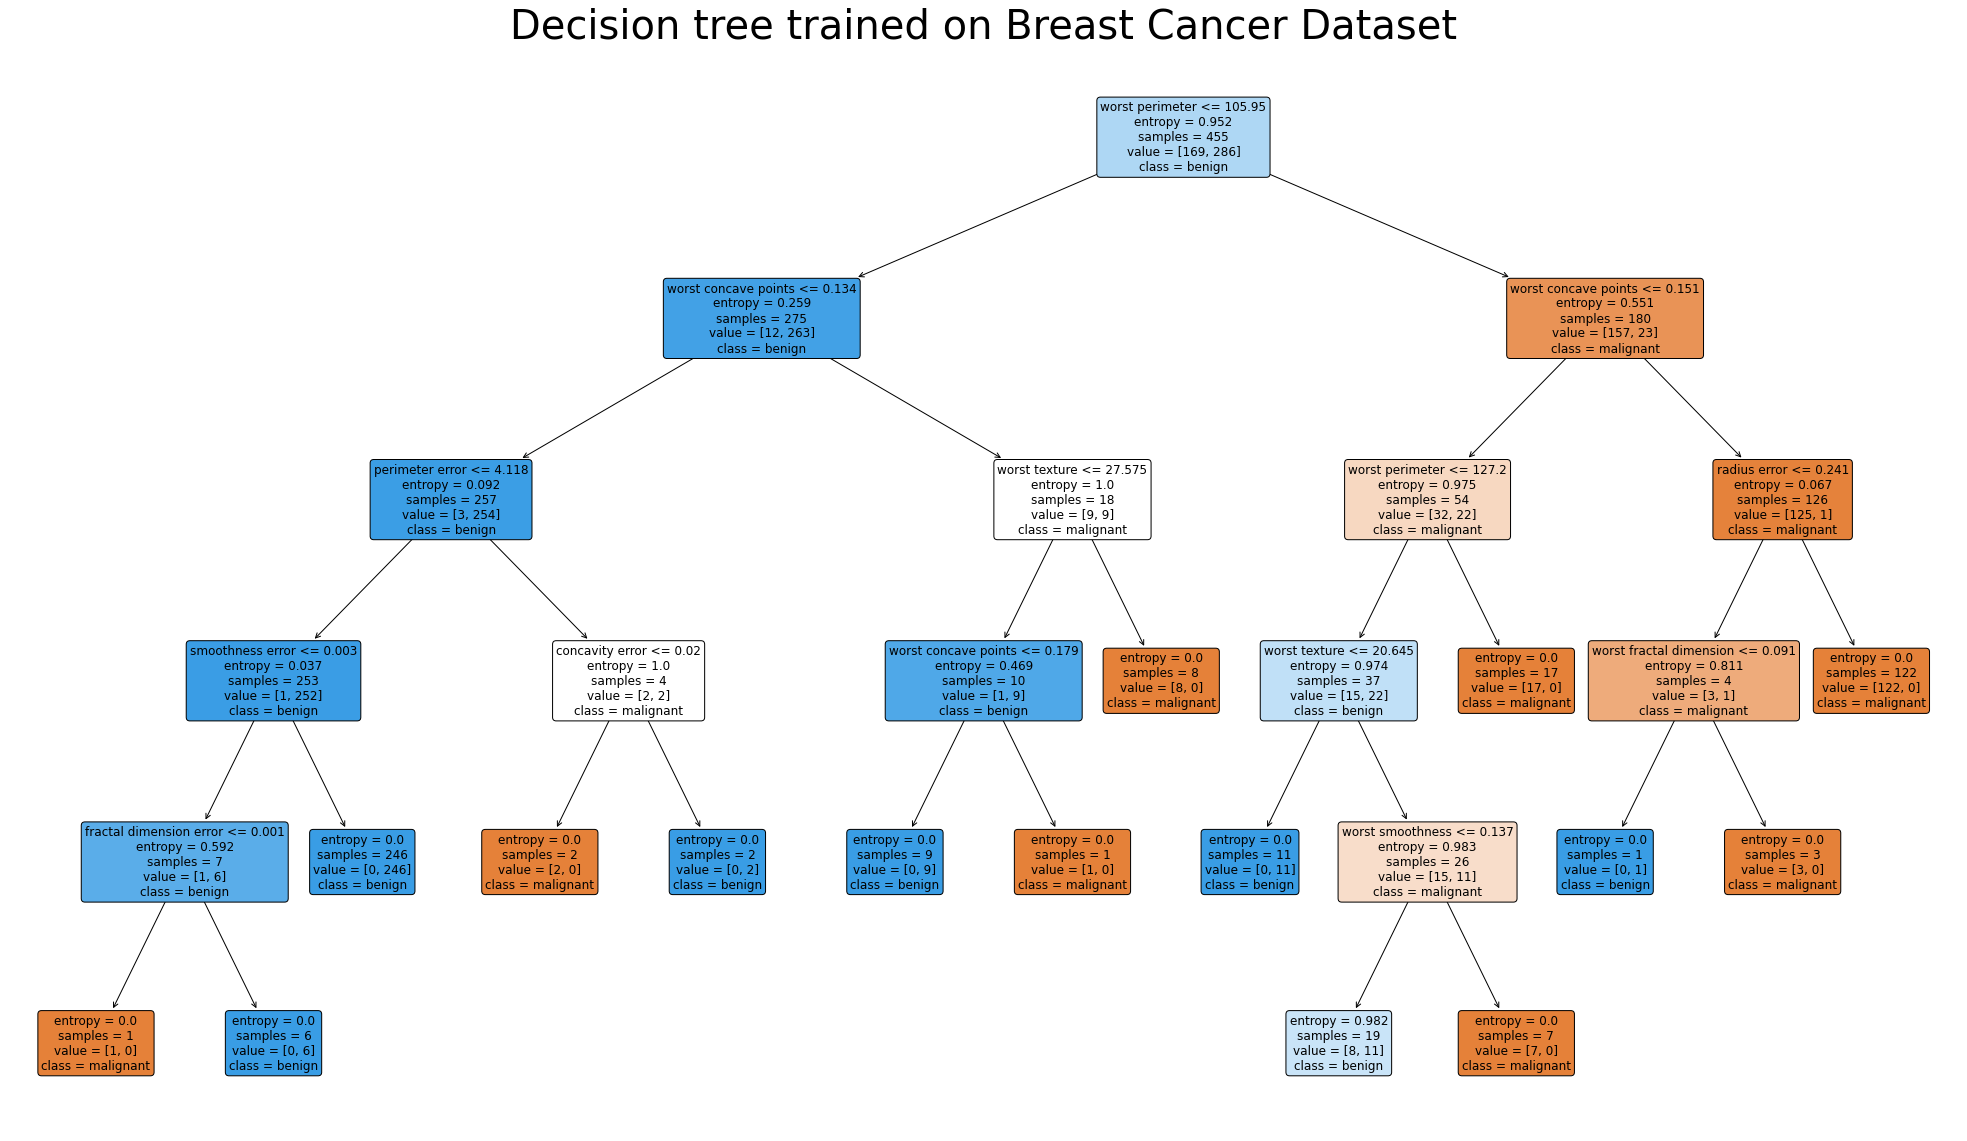

In [19]:
fig = plt.figure(figsize=(35, 20))

plot_tree(
    TREE, feature_names=feature_names, class_names=labels, 
    rounded=True, filled=True, fontsize=12
)
plt.title("Decision tree trained on Breast Cancer Dataset", fontsize=40)
plt.show()

In [20]:
# save decision tree
fig.savefig("./assets/decision_tree.png")

# Evaluation

In [21]:
accuracy_score = metrics.accuracy_score(y_test, predictions)
jaccard_index  = metrics.jaccard_score(y_test, predictions)
F1_score       = metrics.f1_score(y_test, predictions)

# display each matric score
print(f"Accuracy Score : {100 * accuracy_score:.2f} %")
print(f"Jaccard Index  : {100 * jaccard_index:.2f} %")
print(f"F1 score       : {100 * F1_score:.2f} %")

Accuracy Score : 92.98 %
Jaccard Index  : 89.74 %
F1 score       : 94.59 %


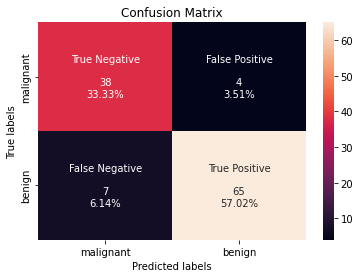

In [12]:
# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

# Information
group_names  = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = [f"{value:.0f}" for value in confusion_matrix.flatten()]

percentage = confusion_matrix.flatten() / np.sum(confusion_matrix)
group_percentages = [f"{value:.2%}" for value in percentage]

# Annotation Labels
annot_labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in \
                zip(group_names, group_counts, group_percentages)]
annot_labels = np.asarray(annot_labels).reshape(2, 2)

# annot=True to annotate cells, ftm='g' to disable scientific notation
ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=annot_labels, fmt="", ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

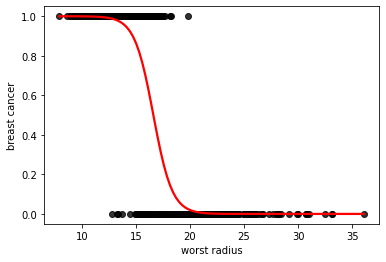

In [14]:
# define the predictor variable and the response variable
x = 'worst perimeter'
y = 'breast cancer'

# plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=DF, logistic=True, ci=None, 
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.show()

In [53]:
np.set_printoptions(precision=2)

report = metrics.classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.95      0.97      0.96        75

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Save Model

In [22]:
save_model(TREE)

# End of Notebook